## Exploratory Data Analysis & Visualization

In [88]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn import  linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import gaussian_process
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [106]:
energy = pd.read_csv('energy.csv',delimiter=";",decimal=",", index_col = [0], parse_dates = [0])

# Object type variables have converted to float type.
# The datetime  object have converted to date format.
df = energy.copy()

In [132]:
df.head()

,consumption (kWh),temperature (Celsius)
datetime,,
2018-01-01 00:00:00,816.0,7.00
2018-01-01 01:00:00,760.0,7.57
2018-01-01 02:00:00,752.0,7.50
2018-01-01 03:00:00,748.0,7.50
2018-01-01 04:00:00,778.0,7.25


In [108]:
df.tail()

,consumption (kWh),temperature (Celsius)
datetime,,
2019-12-31 19:00:00,930.0,5.83
2019-12-31 20:00:00,889.0,5.45
2019-12-31 21:00:00,890.0,5.26
2019-12-31 22:00:00,689.0,5.16
2019-12-31 23:00:00,897.0,5.01


#####  Structured Information of Dataset

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17491 entries, 2018-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   consumption (kWh)      17459 non-null  float64
 1   temperature (Celsius)  16230 non-null  float64
dtypes: float64(2)
memory usage: 409.9 KB


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
consumption (kWh),17459.0,1070.130016,359.266140,13.89,831.00,1034.000,1236.0,20623.00
temperature (Celsius),16230.0,16.891285,7.299669,-3.00,10.75,17.345,23.0,33.25


In [111]:
## df.describe(include = "all").T

#### Continuously Variable Properties

In [112]:
df_num = df.select_dtypes(include = ["float64"])
df_num.head()

,consumption (kWh),temperature (Celsius)
datetime,,
2018-01-01 00:00:00,816.0,7.00
2018-01-01 01:00:00,760.0,7.57
2018-01-01 02:00:00,752.0,7.50
2018-01-01 03:00:00,748.0,7.50
2018-01-01 04:00:00,778.0,NaN


In [113]:
print("Mean: " + str(df_num["consumption (kWh)"].mean()))
print("Filled values: " + str(df_num["consumption (kWh)"].count())) 
print("Max: " + str(df_num["consumption (kWh)"].max()))
print("Min: " + str(df_num["consumption (kWh)"].min()))
print("Median: " + str(df_num["consumption (kWh)"].median()))
print("Standard deviation: " + str(df_num["consumption (kWh)"].std()))

Mean: 1070.1300160375738
Filled values: 17459
Max: 20623.0
Min: 13.89
Median: 1034.0
Standard deviation: 359.2661400253616


In [114]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
consumption (kWh),17459.0,1070.130016,359.266140,13.89,831.00,1034.000,1236.0,20623.00
temperature (Celsius),16230.0,16.891285,7.299669,-3.00,10.75,17.345,23.0,33.25


In [115]:
print("Mean: " + str(df_num["temperature (Celsius)"].mean()))
print("Filled values: " + str(df_num["temperature (Celsius)"].count())) 
print("Max: " + str(df_num["temperature (Celsius)"].max()))
print("Min: " + str(df_num["temperature (Celsius)"].min()))
print("Median: " + str(df_num["temperature (Celsius)"].median()))
print("Standard deviation: " + str(df_num["temperature (Celsius)"].std()))

Mean: 16.891285274183506
Filled values: 16230
Max: 33.25
Min: -3.0
Median: 17.345
Standard deviation: 7.299669036620176


### Sort the dataframe by 'Energy Consumption' in ascending order

In [119]:
df_sort_kW = df.sort_values(by = 'consumption (kWh)', ascending = True) 
print(df_sort_kW [:10]) 

# view first 10 entries, lowest energy consumption is on 17 April

                     consumption (kWh)  temperature (Celsius)
datetime                                                     
2018-04-17 05:00:00              13.89                  10.00
2018-04-17 06:00:00              14.34                  10.50
2019-08-09 05:00:00              57.93                  21.10
2019-12-28 12:00:00              64.23                   6.39
2018-10-03 22:00:00              70.00                    NaN
2018-12-17 19:00:00              85.06                  10.74
2019-06-24 20:00:00             104.78                  26.95
2018-05-03 01:00:00             115.00                    NaN
2019-06-24 21:00:00             118.97                  26.11
2018-01-02 08:00:00             129.00                    NaN


### Analyze of Missing Values

In [117]:
df.isnull().values.any()  # Is There any missing value?

True

In [120]:
df.isnull().sum()  # How many in which variable?

consumption (kWh)          32
temperature (Celsius)    1261
dtype: int64

<AxesSubplot:>

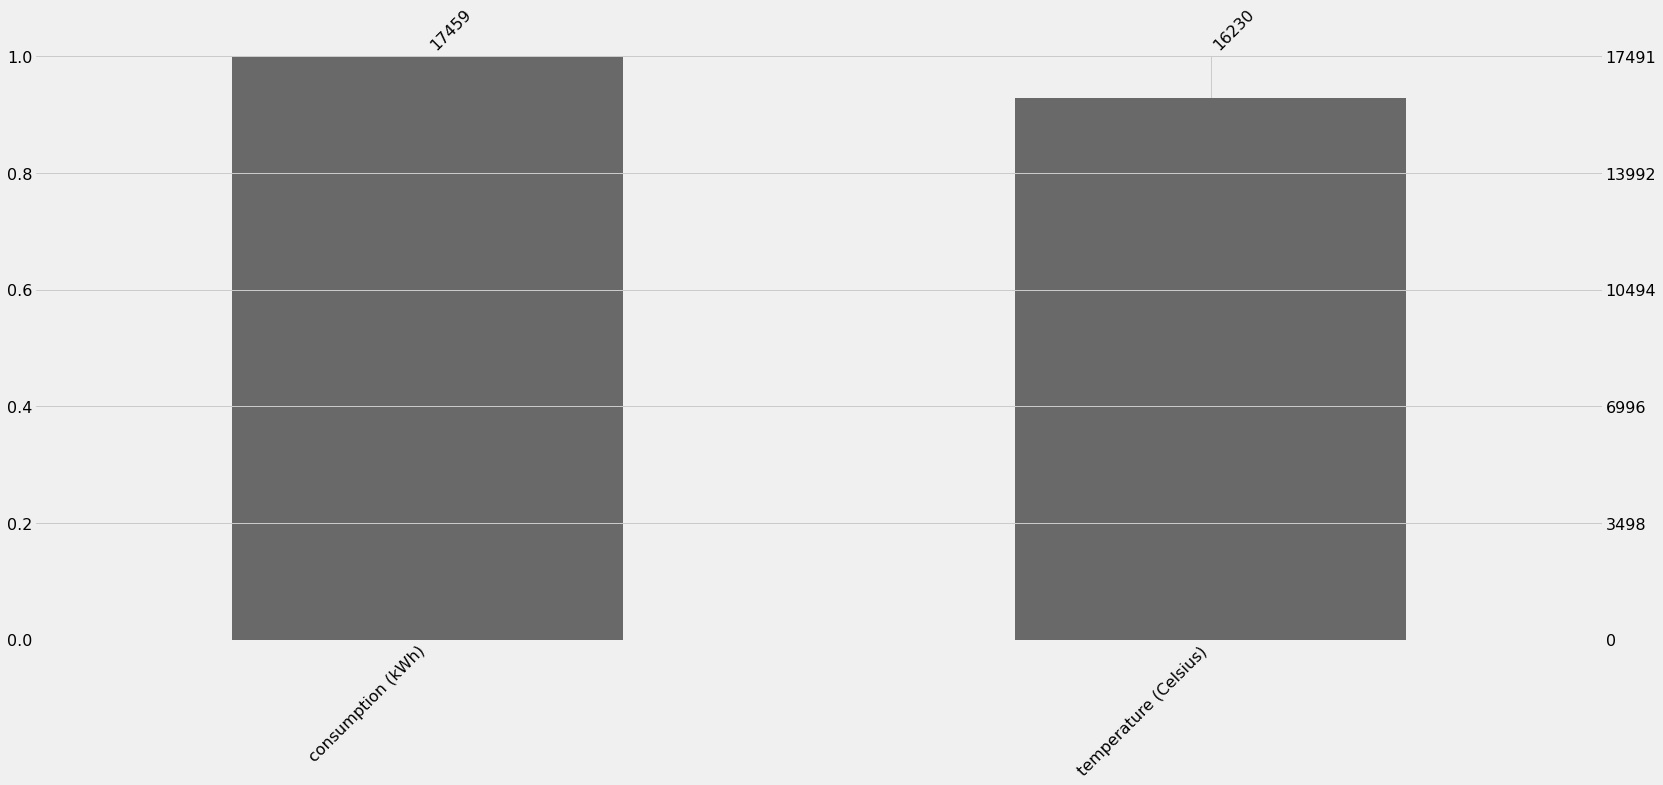

In [121]:
msno.bar(df)

<AxesSubplot:>

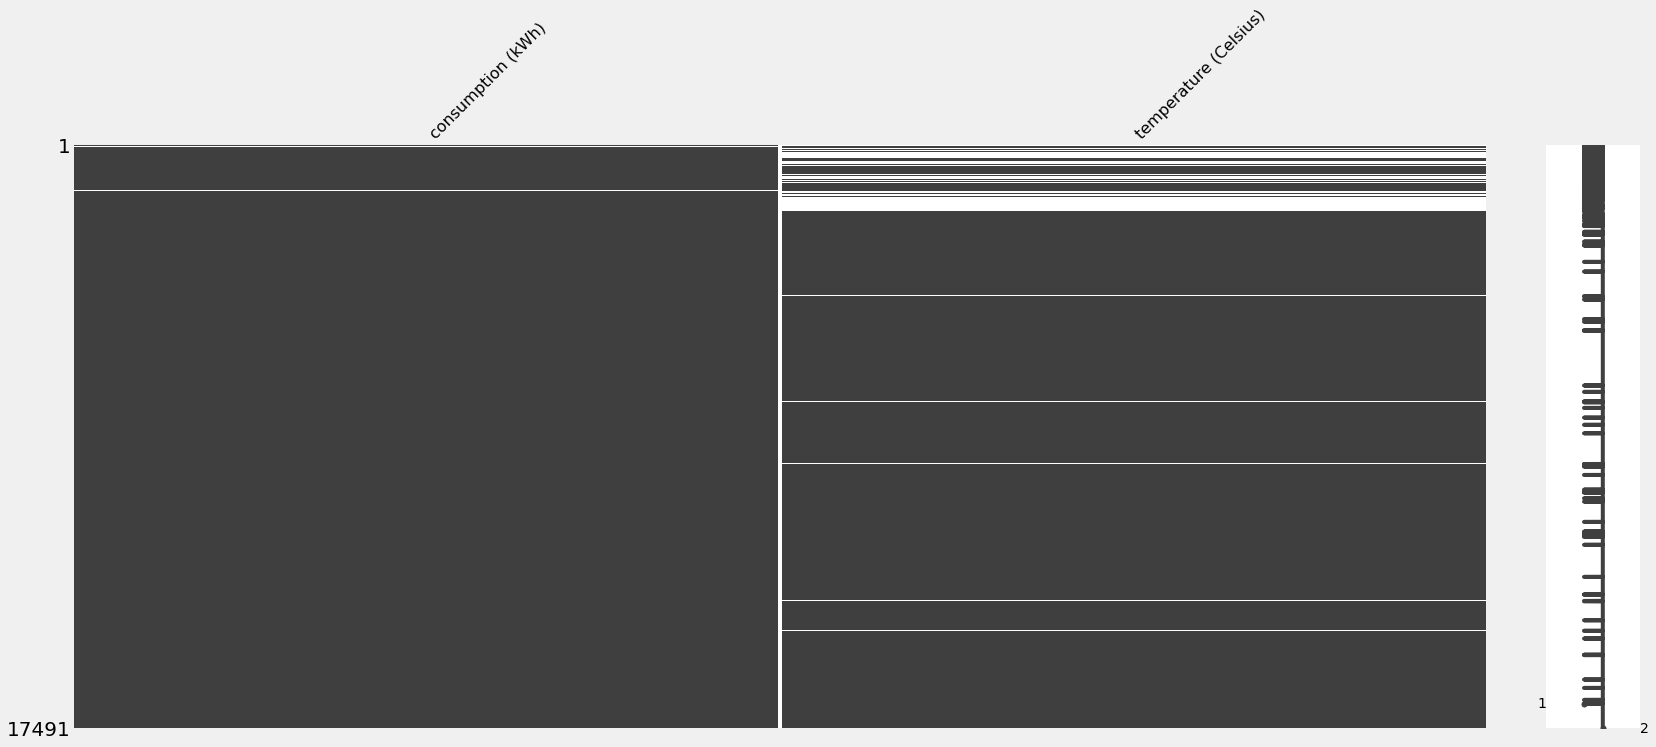

In [122]:
msno.matrix(df)

### Filling in Missing Values

Burada veri setinin hikayesi bilinmelidir.
Hızlı çözüm: eksik değerlerin direkt silinmesi
asit değer atama: ortalama değer eklemesi yapılabilir, median ataması yapılabilir. Veya tahmine dayalı değer atama yapılabilir.

In [125]:
total_cells = np.product(df.shape)

missing_values_count = df.isnull().sum()

total_missing = missing_values_count.sum()

# Let's see how much the missing data is as a percentage (%)
(total_missing/total_cells) * 100  # it is acceptable.

3.6961866102567034

### Filling the 'consumption (kWh)' value with Mean

In [128]:
df['consumption (kWh)'].replace([np.nan], df['consumption (kWh)'].mean(), inplace=True)

### Filling the 'temperature (Celsius)' value with bfill
Filling the temperature value with bfill based on the next observation

In [130]:
df['temperature (Celsius)'] = df['temperature (Celsius)'].fillna(method="bfill")

In [133]:
df.isnull().sum()  # How many in which variable?

consumption (kWh)        0
temperature (Celsius)    0
dtype: int64

### The relationship between Consumption and Temperature 

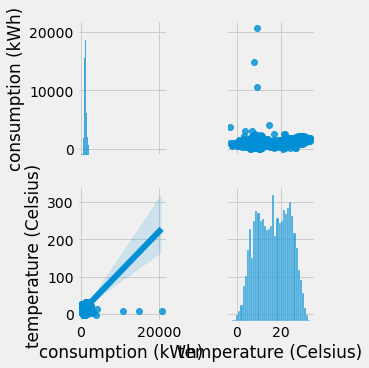

In [147]:
sns.pairplot(df,kind="reg");

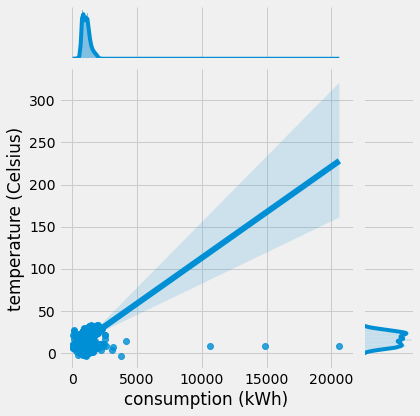

In [149]:
sns.jointplot(x = df['consumption (kWh)'], y = df['temperature (Celsius)'], data = df, kind = "reg");

<AxesSubplot:xlabel='consumption (kWh)', ylabel='temperature (Celsius)'>

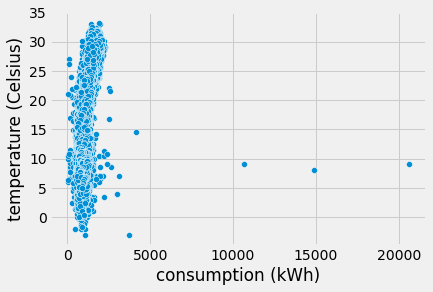

In [150]:
sns.scatterplot(x = df['consumption (kWh)'], y = df['temperature (Celsius)'], data=df)

### The relationship between Consumption and Datetime

In [138]:
df_new = df.drop('temperature (Celsius)', 1)

In [140]:
df_new.head()

,consumption (kWh)
datetime,
2018-01-01 00:00:00,816.0
2018-01-01 01:00:00,760.0
2018-01-01 02:00:00,752.0
2018-01-01 03:00:00,748.0
2018-01-01 04:00:00,778.0


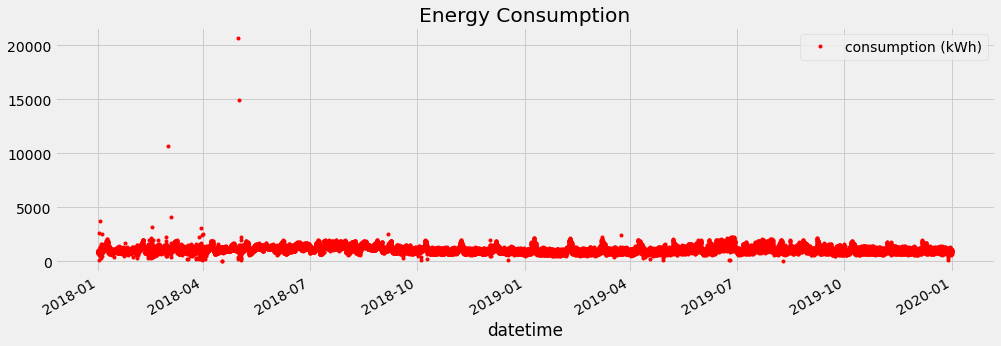

In [144]:
df_new.plot(style = '.' , color = "red", figsize = (15,5), title = "Energy Consumption");

### Splitting Parts of Datetime

In [151]:
df_new['date'] = df_new.index
df_new['hour'] = df_new['date'].dt.hour
df_new['dayofweek'] = df_new['date'].dt.dayofweek
df_new['quarter'] = df_new['date'].dt.quarter
df_new['month'] = df_new['date'].dt.month
df_new['year'] = df_new['date'].dt.year
df_new['dayofyear'] = df_new['date'].dt.dayofyear
df_new['dayofmonth'] = df_new['date'].dt.day
df_new['weekofyear'] = df_new['date'].dt.weekofyear
df_new.drop(['date'], axis = 1, inplace=True)

In [152]:
df_new.head()

,consumption (kWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2018-01-01 00:00:00,816.0,0,0,1,1,2018,1,1,1
2018-01-01 01:00:00,760.0,1,0,1,1,2018,1,1,1
2018-01-01 02:00:00,752.0,2,0,1,1,2018,1,1,1
2018-01-01 03:00:00,748.0,3,0,1,1,2018,1,1,1
2018-01-01 04:00:00,778.0,4,0,1,1,2018,1,1,1


In [153]:
df_new.tail()

,consumption (kWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2019-12-31 19:00:00,930.0,19,1,4,12,2019,365,31,1
2019-12-31 20:00:00,889.0,20,1,4,12,2019,365,31,1
2019-12-31 21:00:00,890.0,21,1,4,12,2019,365,31,1
2019-12-31 22:00:00,689.0,22,1,4,12,2019,365,31,1
2019-12-31 23:00:00,897.0,23,1,4,12,2019,365,31,1


### HOUR

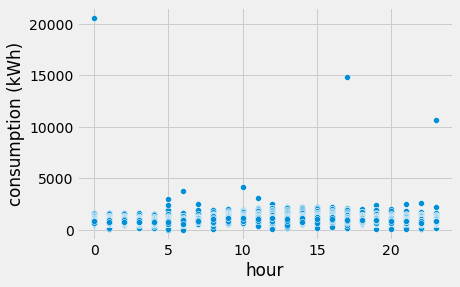

In [157]:
sns.scatterplot('hour','consumption (kWh)', data=df_new);

### DayofWeek

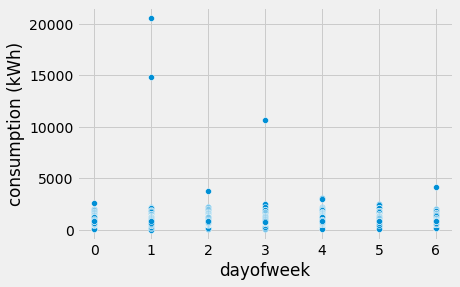

In [158]:
sns.scatterplot('dayofweek','consumption (kWh)', data=df_new);

### Month

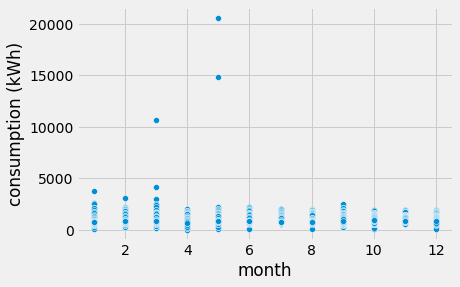

In [160]:
sns.scatterplot('month','consumption (kWh)', data=df_new);

### YEAR

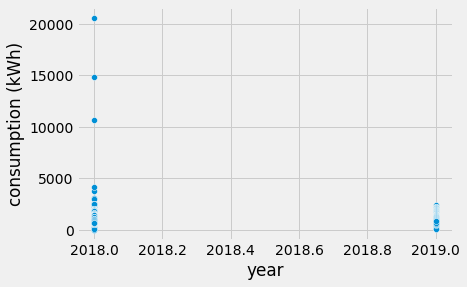

In [165]:
sns.scatterplot('year','consumption (kWh)', data=df_new);

Yearly: Energy consumption is higher in the Summer/Winter as people turn on their heating or AC, and lower in Spring/Fall.

Weekly: Energy consumption is higher on the weekdays as industry are running.

Daily: Energy consumption is lower at night, and higher as the day starts and continues.

Seasonally: The consumption energy demand looks different whether it's summer or winter.

#### Yearly

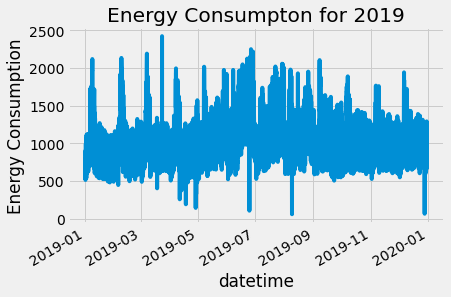

In [191]:
df_new.loc[(df_new.index > '2019-1-1') & (df_new.index < '2019-12-31')]["consumption (kWh)"].plot()
pl.ylabel("Energy Consumption")
pl.title("Energy Consumpton for 2019");

#### Weekly

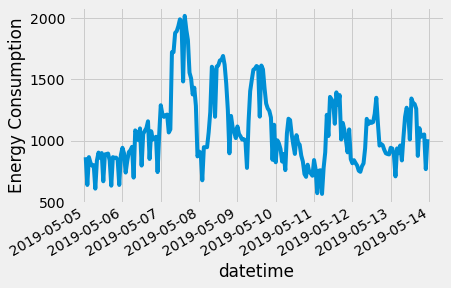

In [193]:
df_new.loc[(df_new.index > '2019-5-05') & (df_new.index < '2019-5-14')]["consumption (kWh)"].plot()
pl.ylabel("Energy Consumption");

#### Daily

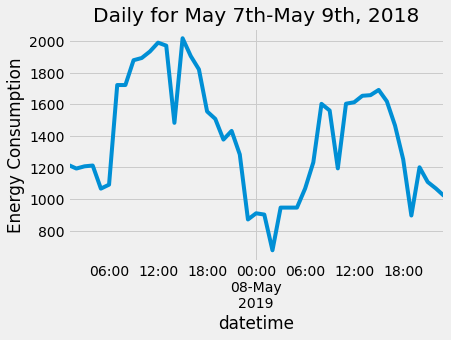

In [197]:
df_new.loc[(df_new.index > '2019-5-07') & (df_new.index < '2019-5-09')]["consumption (kWh)"].plot()
pl.ylabel("Energy Consumption")
pl.title("Daily for May 7th-May 9th, 2018");

### So energy usage will (typically) peak around 6pm, decrease through the night, and increase through the morning.

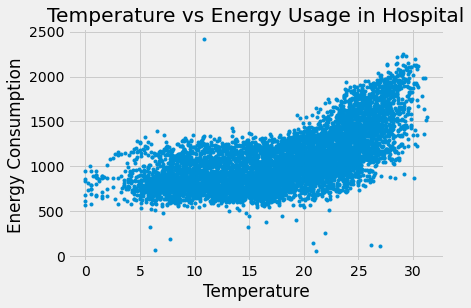

In [208]:
pl.plot(df['temperature (Celsius)'][10000:], df_new['consumption (kWh)'][10000:], '.')
pl.xlabel('Temperature')
pl.ylabel('Energy Consumption')
pl.title('Temperature vs Energy Usage in Hospital');

### Other notes:

Fall and Spring look like a transition between winter and summer--their load graphs are inbetween a double peak and a single peak

Weather intuitively has a strong correlation with energy usage, thus are great variables to use when forecasting future energy demand.

One last graph that's nice to look at is Temperature vs Energy Consumption. These are commonly used to show forecasting results. Notice that at the ends (colder temperature and hotter temperature), energy demand curves up, as we would expect.

### TRAIN-TEST SPLIT

In [273]:
split_date = '01-May-2018'
df_train = df_new.loc[df.index > split_date].copy()
df_test = df_new.loc[df.index <= split_date].copy()

In [275]:
df_test.shape

(2860, 9)

In [276]:
import statsmodels.api as sm


In [277]:
exp_smooth_train, exp_smooth_test = df_train['consumption (kWh)'], df_test['consumption (kWh)']

In [ ]:
holt_winter = sm.tsa.ExponentialSmoothing(exp_smooth_train).fit()
y_hat_holt_winter = holt_winter.forecast(len(exp_smooth_test))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=exp_smooth_test.index, y=exp_smooth_test,
                         mode='lines',
                         name='Test - Ground Truth'))
fig.add_trace(go.Scatter(x=y_hat_holt_winter.index, y=y_hat_holt_winter,
                         mode='lines', 
                         name='Test - Prediction'))

# adjust layout
fig.update_traces(line=dict(width=0.5))
fig.update_layout(title='Holt-Winter Forecast of Hourly Energy Demand',
                  xaxis_title='Date & Time (yyyy/mm/dd hh:MM)',
                  yaxis_title='Energy Demand [MW]')

In [ ]:
def mape(y_true, y_pred):
    """ Mean Absolute Percentage Error """
    
    # convert to numpy arrays
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # take the percentage error
    pe = (y_true - y_pred) / y_true
    
    # take the absolute values
    ape = np.abs(pe)
    
    # quantify the performance in a single number
    mape = np.mean(ape)
    
    return f'{mape*100:.2f}%'

### MODEL

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [266]:
X = df_new[['consumption (kWh)','month']]
y = df_new[['consumption (kWh)','month']]

In [268]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [269]:
accuracy = clf.score(X_test, y_test)


In [270]:
accuracy

1.0

In [265]:
y_train.head()

,consumption (kWh)
datetime,
2018-02-15 01:00:00,575.0
2018-05-23 01:00:00,1188.0
2019-05-10 16:00:00,877.0
2019-09-07 22:00:00,1453.0
2018-04-05 05:00:00,926.0


In [209]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [73]:
X = df['consumption (kWh)']
y = df["datetime"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


### Statsmodel ile modelleme

In [85]:
X = df[['consumption (kWh)']]
X[0:5]

,consumption (kWh)
0,816.0
1,760.0
2,752.0
3,748.0
4,778.0


In [52]:
X = sm.add_constant(X)

In [53]:
X[0:5]

,const,consumption (kWh)
0,1.0,816.0
1,1.0,760.0
2,1.0,752.0
3,1.0,748.0
4,1.0,778.0


In [87]:
y = df[['temperature (Celsius)']]
y[0:5]

import statsmodel as sm

ModuleNotFoundError: No module named 'statsmodel'

In [86]:
lm = sm.OLS(y,X)

NameError: name 'sm' is not defined

In [57]:
model = lm.fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     temperature (Celsius)   R-squared:                       0.328
Model:                               OLS   Adj. R-squared:                  0.328
Method:                    Least Squares   F-statistic:                     7921.
Date:                   Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:40:25   Log-Likelihood:                -51950.
No. Observations:                  16198   AIC:                         1.039e+05
Df Residuals:                      16196   BIC:                         1.039e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.0854      0.152     26.963      0.000       3.788       4.382
consumption (kWh)     0.0119      0.000     89.000      0.000       0.012       0.012
==============================================================================
Omnibus:                    18508.149   Durbin-Watson:                   0.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20513320.915
Skew:                          -5.072   Prob(JB):                         0.00
Kurtosis:                     177.043   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

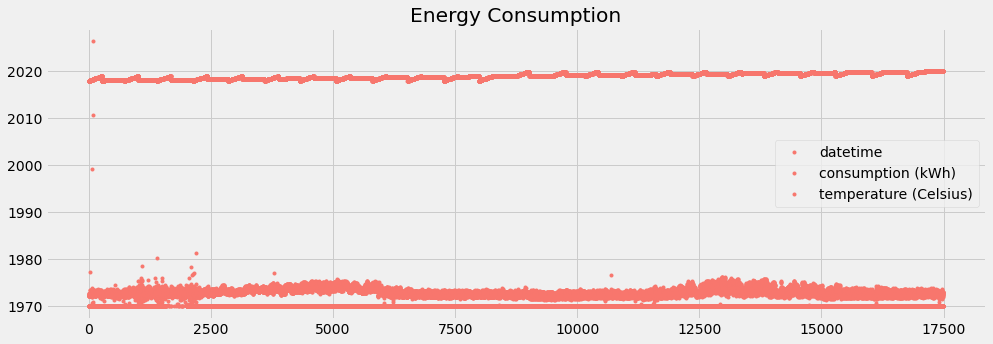

In [64]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='.', figsize=(15,5), color=color_pal[0], title='Energy Consumption')

In [88]:
energy = energy.groupby('mm')[['consumption (kWh)']].sum()
energy = energy.merge(housecount, on = df['mm'])
energy = energy.reset_index()

KeyError: 'mm'

<AxesSubplot:xlabel='datetime'>

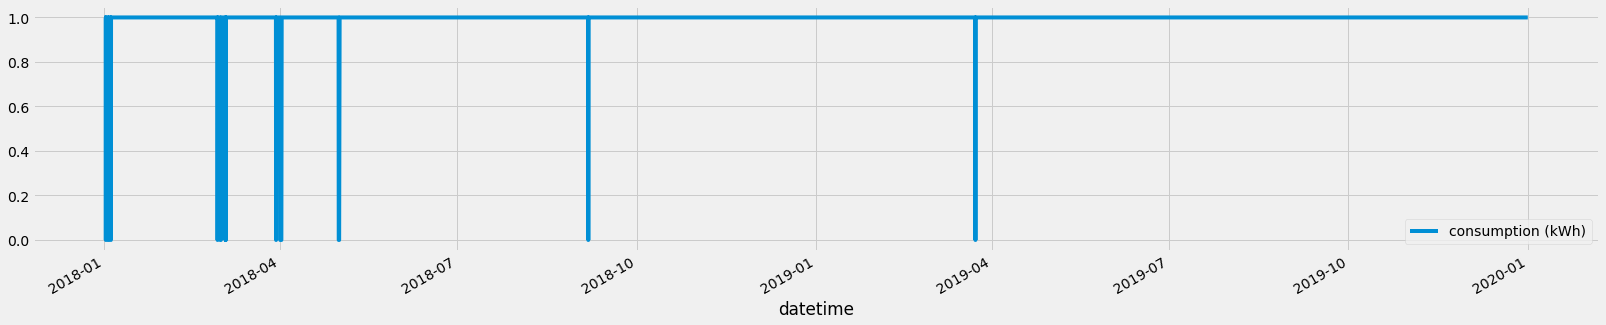

In [76]:
housecount.plot(figsize=(25,5))

In [79]:
df['yyyy'] = pd.to_datetime(df['datetime']).dt.year
df['mm'] = pd.to_datetime(df['datetime']).dt.month

In [82]:
df.head(40)

,datetime,consumption (kWh),temperature (Celsius),yyyy,mm
0,2018-01-01 00:00:00,816.0,7.00,2018,1
1,2018-01-01 01:00:00,760.0,7.57,2018,1
2,2018-01-01 02:00:00,752.0,7.50,2018,1
3,2018-01-01 03:00:00,748.0,7.50,2018,1
4,2018-01-01 04:00:00,778.0,NaN,2018,1
5,2018-01-01 05:00:00,822.0,7.25,2018,1
6,2018-01-01 06:00:00,776.0,7.00,2018,1
7,2018-01-01 07:00:00,811.0,NaN,2018,1
8,2018-01-01 08:00:00,947.0,6.50,2018,1
9,2018-01-01 09:00:00,1040.0,7.25,2018,1
